## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# change option for showing all columns and rows
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [3]:
# load rankings data 
# wood
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
# wood.head()

# steel
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
# steel.head()

# load roller_coaster daat
roller_coaster = pd.read_csv('roller_coasters.csv')
# roller_coaster.head()

## Data cleaning

### Check wood Data

In [4]:
wood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [5]:
wood.describe()

,Rank,Year Built,Points,Year of Rank
count,180.000000,180.000000,180.000000,180.000000
mean,22.127778,1994.450000,392.388889,2016.500000
std,15.217246,24.309061,381.816130,1.388299
min,1.000000,1914.000000,66.000000,2013.000000
25%,8.000000,1994.000000,121.250000,2016.000000
50%,20.500000,2003.000000,213.500000,2017.000000
75%,35.250000,2009.000000,579.500000,2018.000000
max,50.000000,2017.000000,1625.000000,2018.000000


In [6]:
# checking the data year wise
for i in wood['Year of Rank'].unique():
    print(wood.loc[wood['Year of Rank']==i])

   Rank               Name                       Park             Location  \
0     1       Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2            El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3            Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4         The Voyage              Holiday World    Santa Claus, Ind.   
4     5        Thunderhead                  Dollywood  Pigeon Forge, Tenn.   
5     6    Ravine Flyer II                  Waldameer            Erie, Pa.   
6     7         Outlaw Run         Silver Dollar City         Branson, Mo.   
7     8          The Beast               Kings Island    Kings Mills, Ohio   
8     9    Lightning Racer                Hersheypark         Hershey, Pa.   
9    10  Shivering Timbers       Michigan’s Adventure      Muskegon, Mich.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        20

In [7]:
# indexes with duplicate rank for each year
duplicateindex=[]
for i in wood['Year of Rank'].unique():
    locals()['wood'+str(i)[-2:]] = wood.loc[wood['Year of Rank']==i]
    x=locals()['wood'+str(i)[-2:]].loc[locals()['wood'+str(i)[-2:]]['Rank'].duplicated(keep=False),:].index.values.astype(int)
    if len(x)==0:
        pass
    else:
        for j in x.tolist():
            duplicateindex.append(j)

In [8]:
# all duplicate ranks
print(duplicateindex)
# rows with duplicate ranks that are to be corrected
print(wood.iloc[55]['Rank'],
wood.iloc[98]['Rank'],
wood.iloc[99]['Rank'],

wood.iloc[151]['Rank'],

wood.iloc[160]['Rank'],

wood.iloc[168]['Rank'])

[54, 55, 97, 98, 99, 150, 151, 159, 160, 167, 168]
25 18 18 21 30 38


In [9]:
# list of index number that are to be corrected
index_list = [55, 98, 99, 151, 160, 168]

# list of corrected rank value
new_value  = [26, 19, 20, 22,  31,  39]

# loop to correct the rank
for i,j in zip(index_list,new_value):
    wood.loc[i,'Rank']= j

In [10]:
# check the updated dataframe
wood.loc[wood['Year of Rank']==2018]

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
130,1,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",PTC/Schmeck-Dinn,1985,1330,2018
131,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1197,2018
132,3,Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2018
133,4,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,982,2018
134,5,Beast,Kings Island,"Mason, Ohio",KECO,1979,781,2018
135,6,Lightning Rod,Dollywood,"Pigeon Forge, Tenn.",Rocky Mountain,2016,691,2018
136,7,Outlaw Run,Silver Dollar City,"Branson, Mo.",Rocky Mountain,2013,573,2018
137,8,Ravine Flyer II,Waldameer,"Erie, Pa.",Gravity Group,2008,560,2018
138,9,Gold Striker,Califoria’s Great America,"Santa Clara, Calif.",Great Coasters Int.,2013,497,2018
139,10,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",Great Coasters Int.,2004,477,2018


### Check roller_coaster data

In [11]:
roller_coaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


In [12]:
roller_coaster.head(1000)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
5,Bat Coaster,Steel,Inverted,70.0,20.0,400.0,2.0,Pinfari,Nigloland,status.relocated
6,Batman : Arkham Asylum,Steel,Inverted,80.0,32.0,823.0,5.0,B&M,Parque Warner Madrid,status.operating
7,Big Thunder Mountain,Steel,Sit Down,60.0,22.0,1500.0,0.0,Vekoma,Disneyland Park,status.operating
8,EqWalizer,Steel,Sit Down,76.0,36.0,285.0,3.0,Vekoma,Walibi Rhône Alpes,status.operating
9,Calamity Mine,Steel,Sit Down,48.0,14.0,785.0,0.0,Vekoma,Walibi Belgium,status.operating


In [13]:
roller_coaster[['name','height']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    2799 non-null   object 
 1   height  1667 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.9+ KB


In [14]:
roller_coaster[['name','height']].describe()

,height
count,1667.000000
mean,26.725855
std,35.010166
min,0.000000
25%,13.000000
50%,23.000000
75%,35.000000
max,902.000000


In [15]:
pd.isnull(roller_coaster[['name']]).value_counts()

name 
False    2799
True        3
dtype: int64

In [16]:
pd.isnull(roller_coaster[['height']]).value_counts()

height
False     1667
True      1135
dtype: int64

In [17]:
roller_coaster.num_inversions.describe()

count    2405.000000
mean        0.809563
std         1.652254
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: num_inversions, dtype: float64

# Analysis

#### Create a function to plot rankings over time for 1 roller coaster


In [18]:
def rankapark(name,park,data):

    # extracting park data
    park_data = data.loc[(data['Name'] == name) & (data['Park'] == park)]

    # initiate plotting
    plt.figure()
    ax= plt.subplot()
    # plotting 
    plt.plot(park_data['Year of Rank'],park_data.Rank, marker = '*',label=name)
    plt.xlabel('Years')
    plt.ylabel('Rank')
    plt.title('Standing')
    plt.legend()
    # setting y axis ticks
    ax.set_yticks(range(1,park_data.Rank.max()+1))
    # inverting the axis
    plt.gca().invert_yaxis()
    return plt.show()

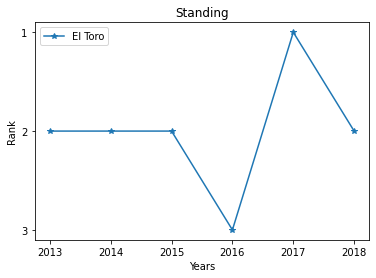

In [19]:
# Create a plot of El Toro ranking over time
rankapark('El Toro', 'Six Flags Great Adventure',wood)

#### Create a function to plot rankings over time for 2 roller coaster

In [20]:
def rankparks(name,name2,park,park2,data):
    
    # extracting park data
    park_data  = data.loc[(data['Name'] == name) & (data['Park'] == park)]
    park_data2 = data.loc[(data['Name'] == name2) & (data['Park'] == park2)]
    
    # initiate plotting
    plt.figure()
    ax= plt.subplot()
    #plotting
    plt.plot(park_data['Year of Rank'],park_data.Rank, marker = '*',label=name)
    plt.plot(park_data2['Year of Rank'],park_data2.Rank, marker = 'o',label=name2)
    plt.xlabel('Years')
    plt.ylabel('Rank')
    plt.title('Standing')
    plt.legend([name,name2])
    
    # get max rank from two 
    rank1 = park_data.Rank.max()
    rank2 = park_data2.Rank.max()
    if rank1 > rank2:
        rank = rank1
    else:
        rank = rank2

    # set y axis ticks    
    ax.set_yticks(range(1,rank+1))
    # invert the axis
    plt.gca().invert_yaxis()
    return plt.show()

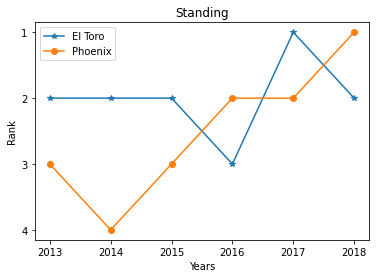

In [21]:
rankparks('El Toro', 'Phoenix','Six Flags Great Adventure','Knoebels Amusement Resort',wood)

#### Create a function to plot top n rankings over time

In [22]:
def nrankpark(data,n):
    
    
    # sort data for n rank
    data1 = data[data.Rank >= n]
    
    # all different Name with their corresponding park
    name_park = data[['Name','Park']].drop_duplicates().reset_index(drop=True)
    
    # store ranks for y axis tick
    max_rank = []
    
    # initiate plotting
    plt.figure(figsize=(10,10))
    ax = plt.subplot()

    # extracting park data
    for i,j in zip(name_park.Name, name_park.Park):
        park_data = data1.loc[(data1['Name'] == i) & (data1['Park'] == j)] 
    
    # plotting
        if park_data.empty:
            pass
        else:
            plt.plot(park_data['Year of Rank'],park_data.Rank, marker = '*',label=i)
            max_rank.append(park_data.Rank.max())

    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # set y axis ticks
    ax.set_yticks(range(1,max(max_rank)+1))
    # invert the axis
    plt.gca().invert_yaxis()
    plt.xlabel('Years')
    plt.ylabel('Rank')
    plt.title('Standing')
    return plt.show()

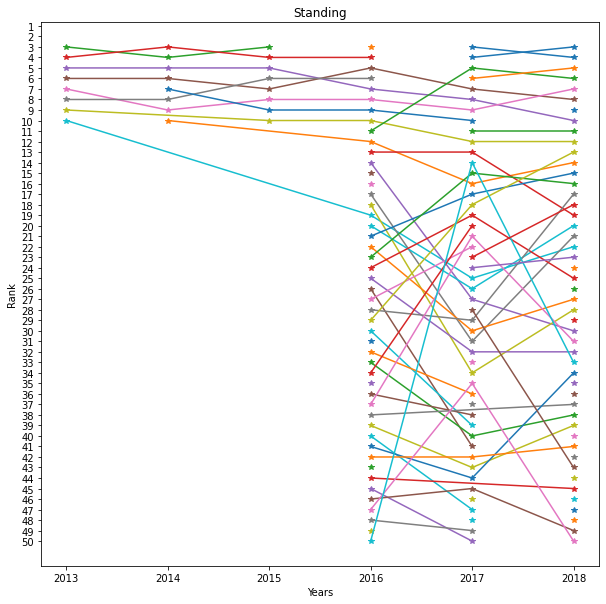

In [23]:
# Create a plot of top n rankings over time
nrankpark(wood,3)

#### Create a function to plot histogram of column values


In [24]:
def plothist(data,col_name):
    
    # data cleaning
    data.dropna(inplace = True)
    
    # check for height column 
    if col_name == 'height':
        # deal with outliers and plot
        plt.hist(data.loc[data[col_name] <= 140,[col_name]], bins =20)
    else:
        # plot other column
        plt.hist(data[col_name], bins = 20)

    plt.xlabel(col_name.title())
    plt.ylabel('Frequency')
    plt.title("{a} Histogram".format(a=col_name.title()))
    return plt.show()

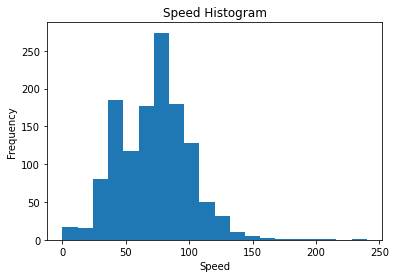

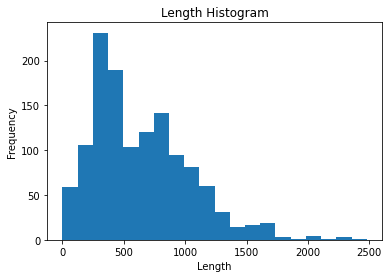

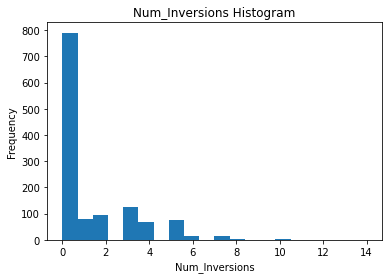

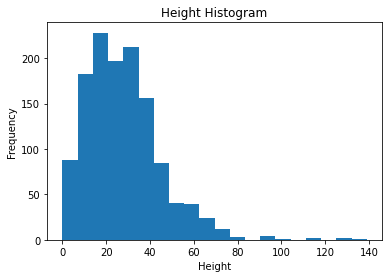

In [25]:
# Create histogram of roller coaster speed
plothist(roller_coaster,'speed')

# Create histogram of roller coaster length
plothist(roller_coaster,'length')

# Create histogram of roller coaster number of inversions
plothist(roller_coaster,'num_inversions')

# Create histogram of roller coaster length
plothist(roller_coaster,'height')

#### Create a function to plot inversions by coaster at park

In [26]:
def plotbar(data,park_name):
    
    # data cleaning
    data.dropna(inplace=True)
    # extract data 
    data = data.loc[data['park']==park_name]
    # sort as per num_inversions 
    data = data.sort_values(by='num_inversions', ascending=False)
    
    #initiate plot
    plt.figure()
    ax= plt.subplot()
    
    # plot
    plt.bar(data['name'], data['num_inversions'])
    plt.xlabel('Park Name')
    plt.ylabel('Number of inversion')
    # rotate x labels to fit 
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    return plt.show()

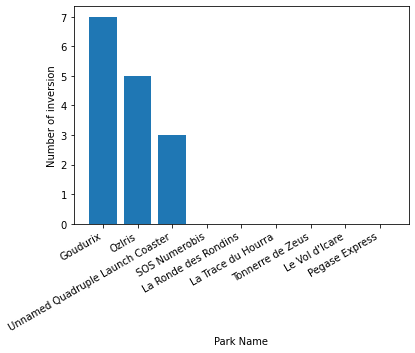

In [27]:
# Create barplot of inversions by roller coasters
plotbar(roller_coaster,'Parc Asterix')

#### Create a function to plot a pie chart of status.operating

In [28]:
def plotpie(data):
    
    # data wrangle
    x = pd.DataFrame(data.groupby(by='status')['park'].count().reset_index())
    # extract data for pie chart
    piedata = x.loc[(x['status']=='status.operating') | (x['status']=='status.closed.definitely')]
    plt.pie(piedata.park,autopct='%0.1f%%')
    plt.axis('equal')
    plt.legend(piedata.status)
    return plt.show()

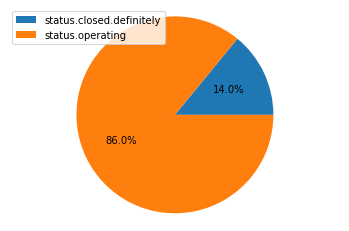

In [29]:
# Create pie chart of roller coasters
plotpie(roller_coaster)

#### Create a function to plot scatter of any two columns

In [30]:
def scatter(data,col_name1,col_name2):
    
    # data clean
    data.dropna(inplace=True)
    
    # deal with height column
    if   (col_name1 == 'height'):
        data = data[data[col_name1]<=140]
    elif (col_name2 == 'height'): 
        data = data[data[col_name2]<=140]
    else:
        pass
    
    # data for plot
    x_values = data[col_name1]
    y_values = data[col_name2]
    
    # initiate plot
    plt.figure()
    ax = plt.subplot 
    plt.scatter(x_values,y_values)
    plt.xlabel(col_name1.title())
    plt.ylabel(col_name2.title())
    return plt.show()


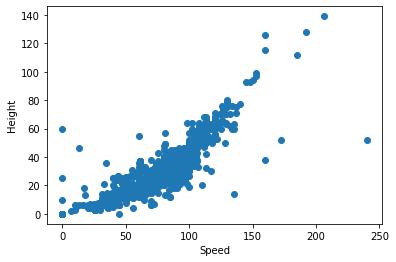

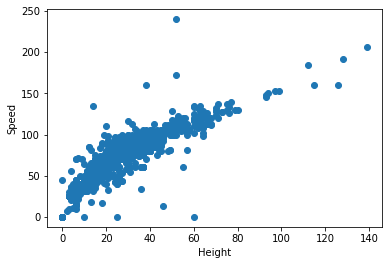

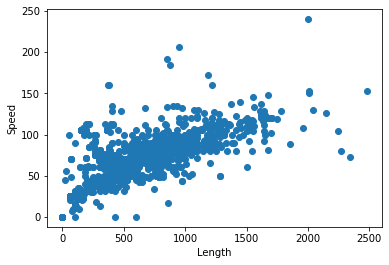

In [31]:
# Create a function to plot scatter of speed vs height
scatter(roller_coaster,'speed','height')

# Create a scatter plot of roller coaster height by speed
scatter(roller_coaster,'height','speed')

# Create a scatter plot of roller coaster length by speed
scatter(roller_coaster,'length','speed')